In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as stats
import seaborn as sns

file_path = 'D:/Westford/Westford Masters/AI/Dataset/diabetes.csv'
df = pd.read_csv(file_path)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df.head)
print(df.info)
print(df.describe())

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12      

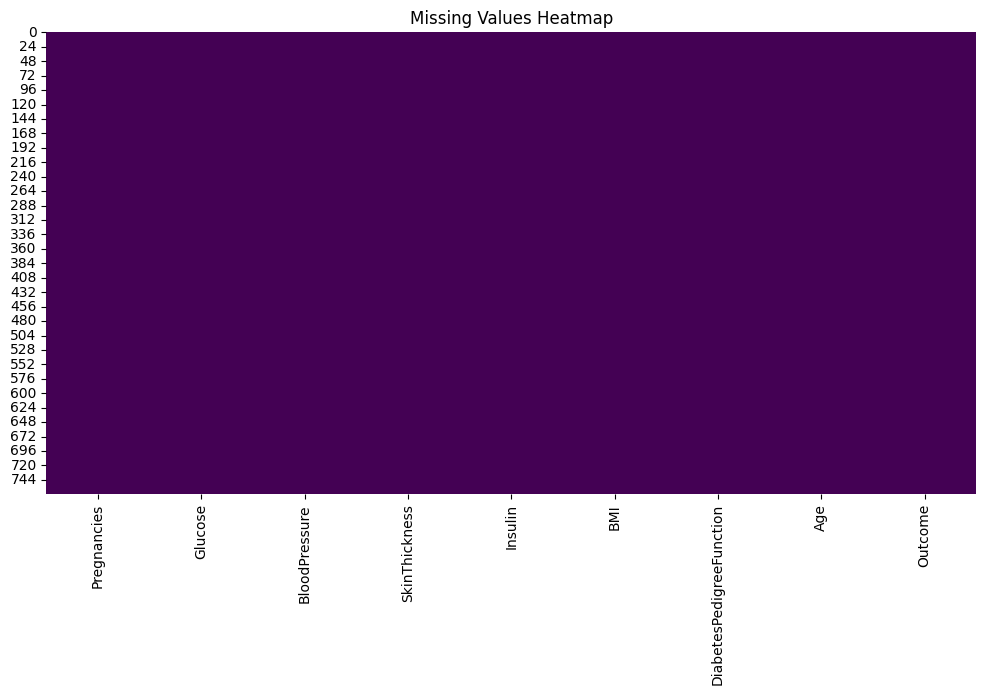

Number of duplicate entries: 0


In [2]:
# Check for missing values visually
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")


Number of NaN values after replacing 0s:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


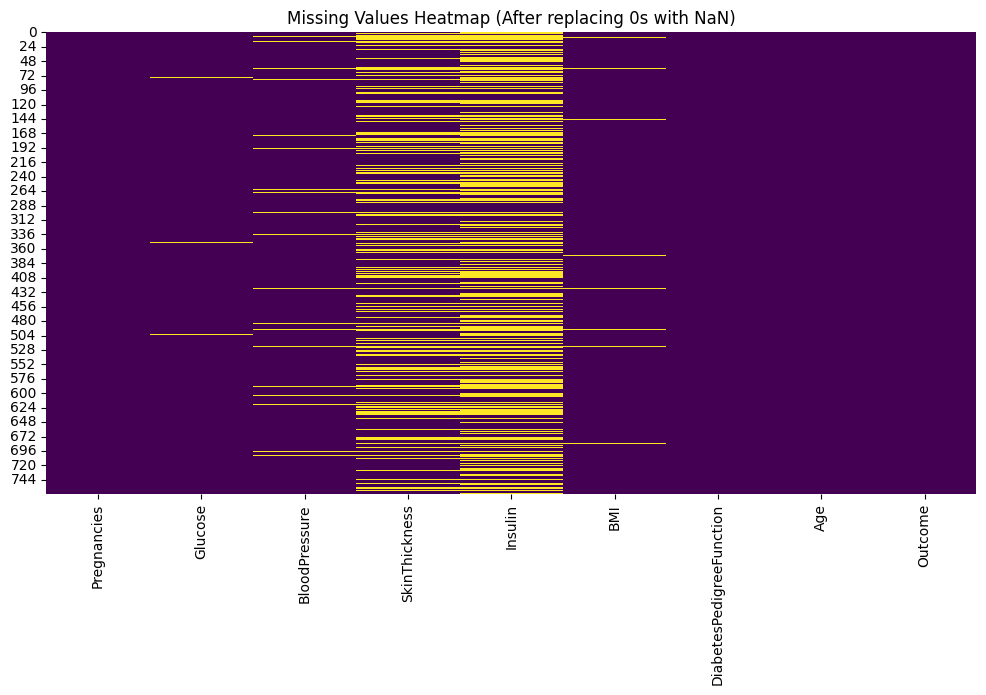


Number of NaN values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Distribution of 'Outcome' (Diabetes Status):
Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


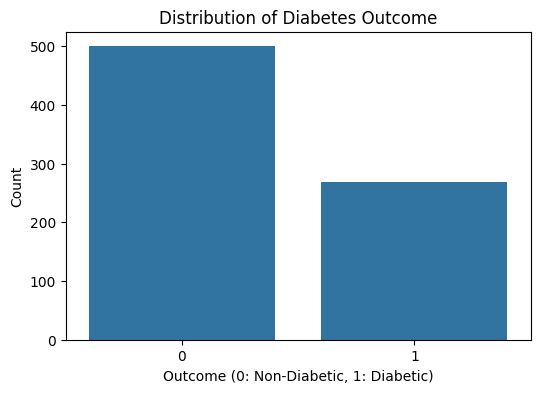


Distribution of Numerical Features (Histograms/KDE Plots after imputation):


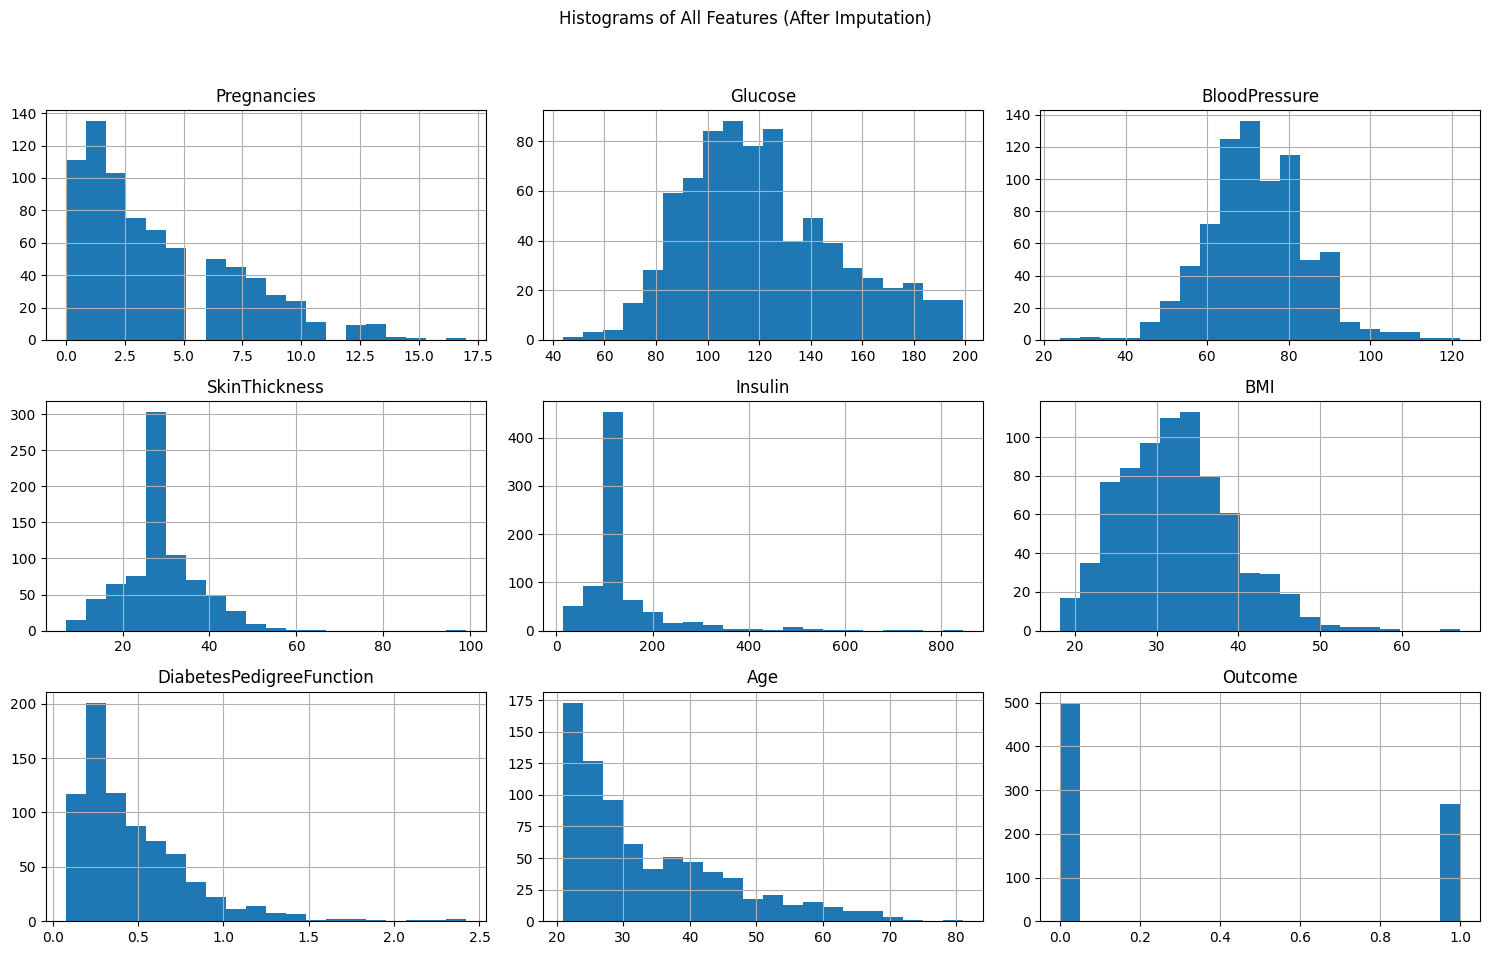


Relationships between Features and Outcome (Box Plots):


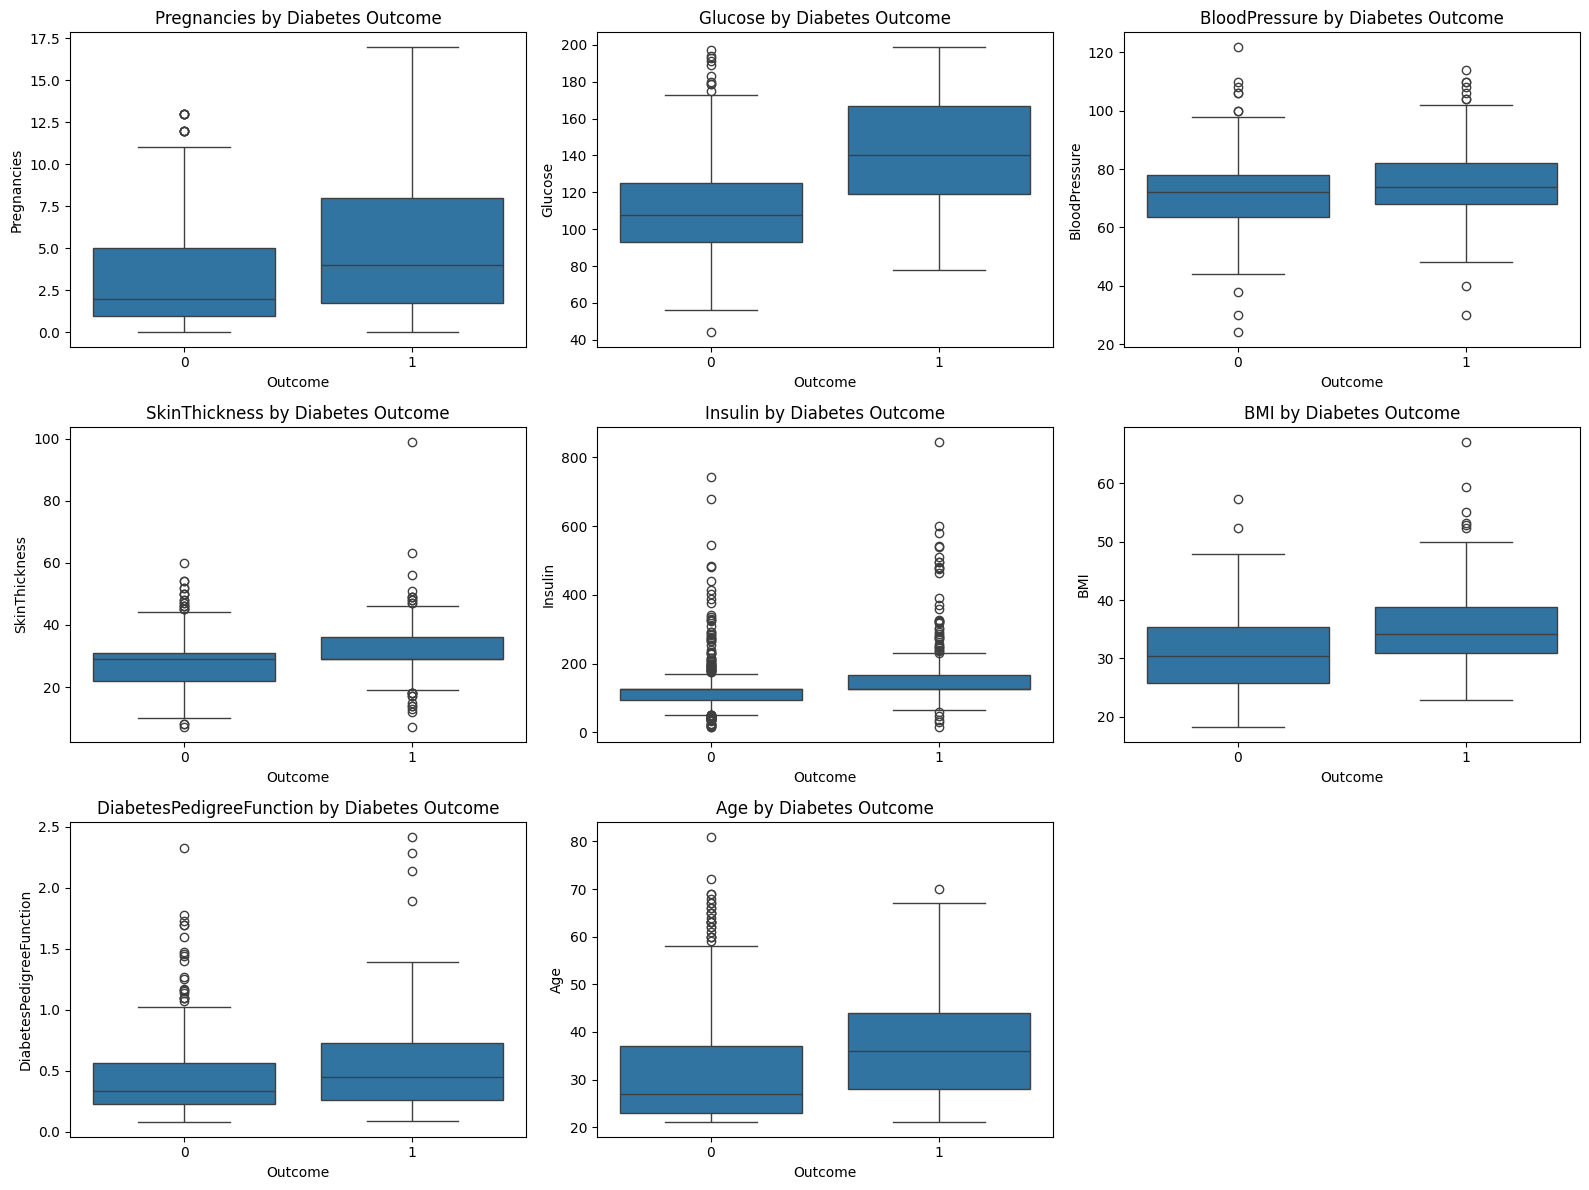


Correlation Matrix (Heatmap):


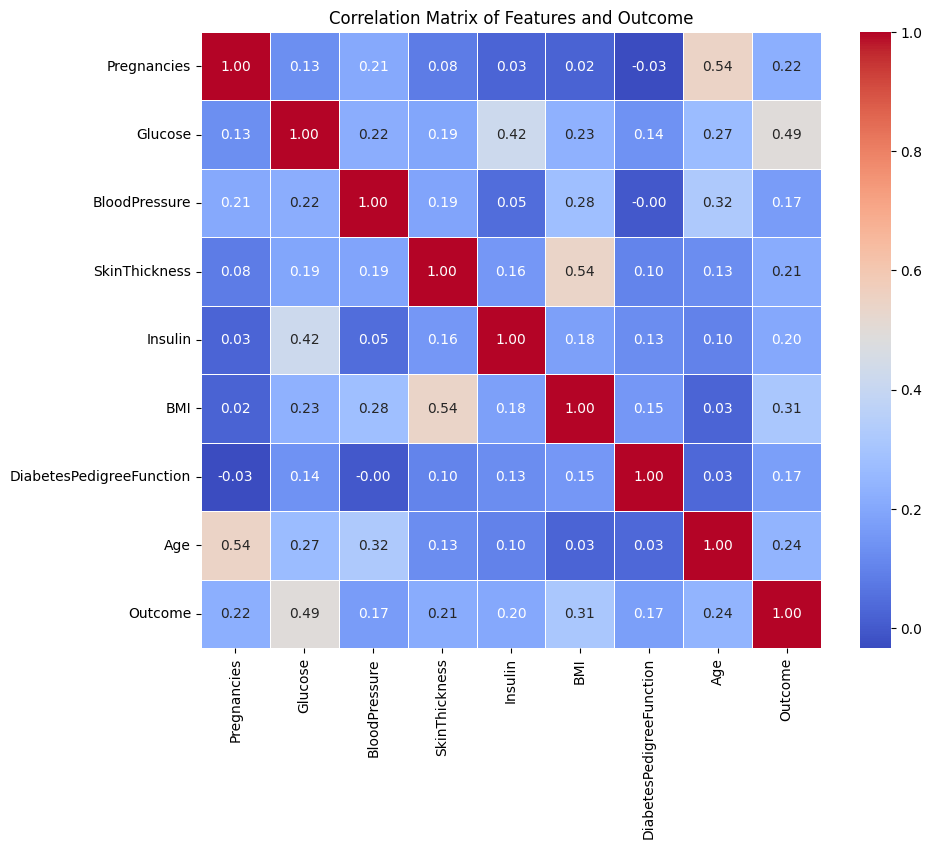

In [3]:
# 1. Replace 0s with NaN in specific columns
# Columns where 0 values are biologically impossible and represent missing data
cols_with_zeros_as_nan = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zeros_as_nan:
    df[col] = df[col].replace(0, np.nan)

print("\nNumber of NaN values after replacing 0s:")
print(df.isnull().sum())

# 2. Check for missing values visually (again, after replacing 0s with NaN)
# Now the heatmap should show the actual missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (After replacing 0s with NaN)')
plt.show()

# Expected Insight: This heatmap will now visually confirm the presence of missing values (as NaNs)
# in Glucose, BloodPressure, SkinThickness, Insulin, and BMI. Insulin and SkinThickness usually have the most.

# 3. Handle Missing Values (Imputation)
# Impute missing values (NaNs) with the median of their respective columns.
# Median is often preferred for skewed data or when outliers might be present,
# as it's less sensitive than the mean.

for col in cols_with_zeros_as_nan:
    df[col] = df[col].fillna(df[col].median())

print("\nNumber of NaN values after imputation:")
print(df.isnull().sum()) # This should now show 0 NaNs for all columns

# Expected result: All missing values (which were originally 0s) are now imputed.

# 4. Distribution of Target Variable ('Outcome')
print("\nDistribution of 'Outcome' (Diabetes Status):")
print(df['Outcome'].value_counts())
print(df['Outcome'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.show()

# Expected Insight: You will observe a class imbalance, with significantly more non-diabetic (0) cases
# than diabetic (1) cases. This is crucial for choosing appropriate evaluation metrics.

# 5. Distribution of Numerical Features (Histograms/KDE Plots)
# Now that 0s are imputed, these plots will be more representative.
print("\nDistribution of Numerical Features (Histograms/KDE Plots after imputation):")
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of All Features (After Imputation)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# 6. Relationships between Features and Target Variable (Box Plots)
print("\nRelationships between Features and Outcome (Box Plots):")
# Select features to visualize against the outcome
features_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'{feature} by Diabetes Outcome')
plt.tight_layout()
plt.show()

# Expected Insights:
# - For 'Glucose', 'BMI', 'Age', 'Pregnancies', and 'DiabetesPedigreeFunction', you'd expect to see higher median values and often a wider spread for the '1' (diabetic) group compared to the '0' (non-diabetic) group. This visually confirms their predictive power.
# - 'BloodPressure' and 'SkinThickness' might show less distinct differences, or subtle shifts.
# - 'Insulin' often shows a significant difference, with higher levels in the diabetic group.

# 7. Correlation Matrix (Heatmap)
print("\nCorrelation Matrix (Heatmap):")
plt.figure(figsize=(10, 8))
# Exclude the 'Outcome' column for feature-feature correlation, then add it back for feature-target correlation
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features and Outcome')
plt.show()


--- Data split and scaled successfully. Ready for Model Training ---

Training Logistic Regression Model...

--- Logistic Regression Model Performance ---
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.53      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231

Confusion Matrix:
[[129  21]
 [ 38  43]]

Training Random Forest Classifier Model...

--- Random Forest Classifier Model Performance ---
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.69      0.53      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231

Confusion Matrix:
[[131  19]
 [ 38  43]]

Training Ga

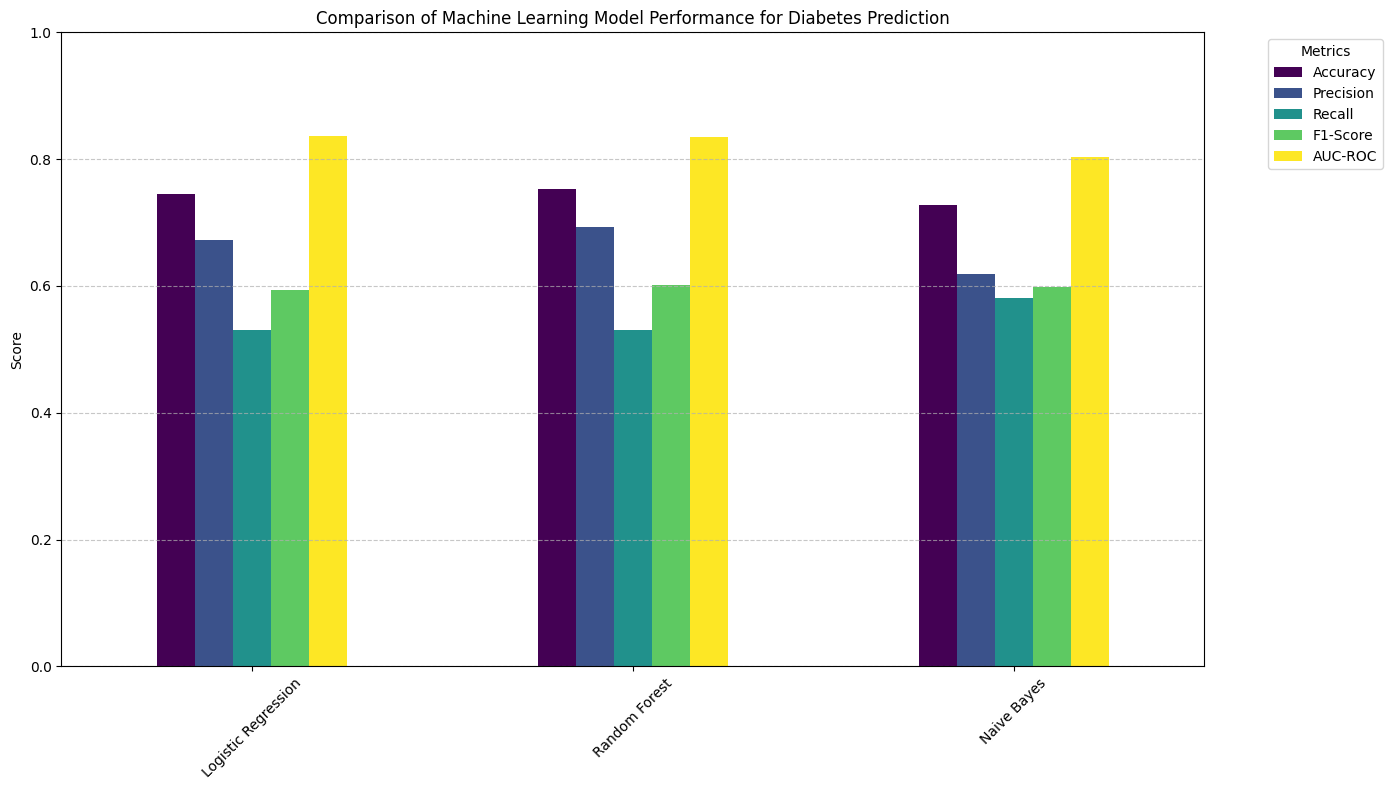


--- Gaussian Naive Bayes Model Performance ---
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       150
           1       0.62      0.58      0.60        81

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.72      0.73      0.73       231

Confusion Matrix:
[[121  29]
 [ 34  47]]


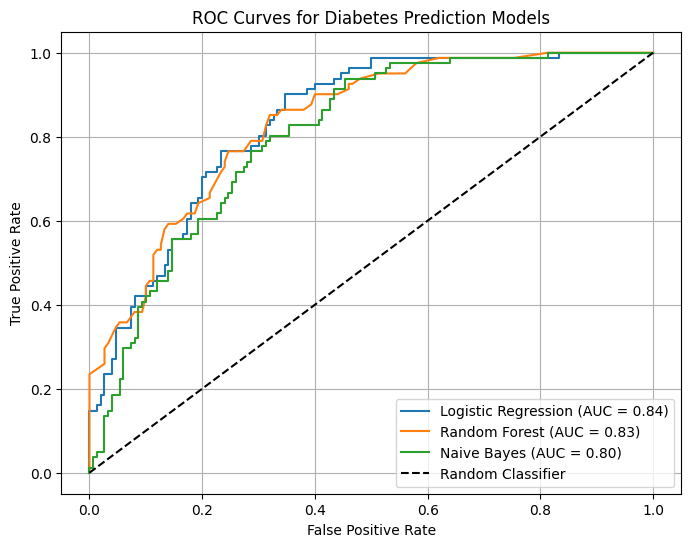


--- Model Comparison Chart Generated ---
These results would be compared to select the best model for MedAI.


In [7]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, classification_report
)


# Data Preparation
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n--- Data split and scaled successfully. Ready for Model Training ---")

# Model Training and Evaluation
model_performance = {}

# Model 1: Logistic Regression 
print("\nTraining Logistic Regression Model...")
lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

model_performance['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1-Score': f1_score(y_test, y_pred_lr),
    'AUC-ROC': roc_auc_score(y_test, y_prob_lr)
}

print("\n--- Logistic Regression Model Performance ---")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

# Model 2: Random Forest Classifier 
print("\nTraining Random Forest Classifier Model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

model_performance['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'AUC-ROC': roc_auc_score(y_test, y_prob_rf)
}

print("\n--- Random Forest Classifier Model Performance ---")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# --- Model 3: Gaussian Naive Bayes ---
print("\nTraining Gaussian Naive Bayes Model...")
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred_nb = nb_model.predict(X_test_scaled)
y_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

model_performance['Naive Bayes'] = {
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'Precision': precision_score(y_test, y_pred_nb),
    'Recall': recall_score(y_test, y_pred_nb),
    'F1-Score': f1_score(y_test, y_pred_nb),
    'AUC-ROC': roc_auc_score(y_test, y_prob_nb)
}

print("\n--- Gaussian Naive Bayes Model Performance ---")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))



# Graphical Comparison of Model Performance
print("\n--- Generating Model Performance Comparison Chart ---")
metrics_df = pd.DataFrame.from_dict(model_performance, orient='index')
metrics_df = metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']]  # Ensure column order

# Plotting
metrics_df.plot(kind='bar', figsize=(14, 8), colormap='viridis', rot=45)
plt.title('Comparison of Machine Learning Model Performance for Diabetes Prediction')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gaussian Naive Bayes Model Performance Already Calculated 
print("\n--- Gaussian Naive Bayes Model Performance ---")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

from sklearn.metrics import roc_curve

# ROC Curve for all models
plt.figure(figsize=(8, 6))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})")

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})")

# Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_score(y_test, y_prob_nb):.2f})")

# Reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Diabetes Prediction Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("\n--- Model Comparison Chart Generated ---")
print("These results would be compared to select the best model for MedAI.")


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



# Tuning Logistic Regression



# Define the parameter grid
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],       # Regularization strength
    'solver': ['liblinear', 'lbfgs']           # Solvers
}

# Create GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid_lr,
    scoring='roc_auc',        # Focus on AUC-ROC for imbalance
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search_lr.fit(X_train_scaled, y_train)

# Best results
print("\n>> Best Parameters for Logistic Regression:")
print(grid_search_lr.best_params_)
print(f">> Best Cross-Validation AUC-ROC: {grid_search_lr.best_score_:.4f}")

# Use best estimator for testing
best_lr_model = grid_search_lr.best_estimator_

# Tuning Random Forest Classifier

print("\n--- Tuning Random Forest Hyperparameters ---")

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]
}

# Create GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search_rf.fit(X_train_scaled, y_train)

# Best results
print("\n>> Best Parameters for Random Forest:")
print(grid_search_rf.best_params_)
print(f">> Best Cross-Validation AUC-ROC: {grid_search_rf.best_score_:.4f}")

# Use best estimator for testing
best_rf_model = grid_search_rf.best_estimator_



Fitting 5 folds for each of 12 candidates, totalling 60 fits

>> Best Parameters for Logistic Regression:
{'C': 1, 'solver': 'liblinear'}
>> Best Cross-Validation AUC-ROC: 0.8361

--- Tuning Random Forest Hyperparameters ---
Fitting 5 folds for each of 72 candidates, totalling 360 fits

>> Best Parameters for Random Forest:
{'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
>> Best Cross-Validation AUC-ROC: 0.8197


In [ ]:
import joblib
joblib.dump(best_lr_model, 'logistic_model_tuned.pkl')

['logistic_model_tuned.pkl']